<a href="https://colab.research.google.com/github/NourhanSowar/Spotify-Skip-Action-Prediction-Data-Science-Internship/blob/main/EDA_on_Features_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Spotify Skip Action Prediction 






# 1- Data Loading 

* Download data (track features) from colud 
---


In [ ]:

import urllib.request
''' features dataset link'''
url = 'https://os.zhdk.cloud.switch.ch/swift/v1/crowdai-public/spotify-sequential-skip-prediction-challenge/20181120_track_features.tar.gz '

downloaded_filename = 'modis_c6_luts.tar.gz'

urllib.request.urlretrieve(url, downloaded_filename)

('modis_c6_luts.tar.gz', <http.client.HTTPMessage at 0x7f9b23f9a5d0>)

* Unzipping Features data
---



In [ ]:
import tarfile

fname = 'modis_c6_luts.tar.gz'

if fname.endswith("tar.gz"):

    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()


* Connet with Google drive
---



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


* Save the feature dataset in my drive
---


In [ ]:

!cp -r '/content/modis_c6_luts.tar.gz' /content/gdrive/MyDrive/Technocolabs


In [ ]:
!cp -r '/content/track_features' /content/gdrive/MyDrive/Technocolabs


* Read 3 feature tracks files from Google Drive\
---



In [ ]:
tf_mini=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/track_features/tf_mini.csv') # from Github Repo
tf_01 = pd.read_csv('/content/gdrive/MyDrive/Technocolabs/track_features/tf_000000000001.csv') #from track_features
tf_0=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/track_features/tf_000000000000.csv') #from track_features


In [ ]:
result=pd.merge(tf_0,tf_01,on='track_id',how='left') #merge 2 files in dataset using left join 


In [ ]:
result.columns

Index(['track_id', 'duration_x', 'release_year_x', 'us_popularity_estimate_x',
       'acousticness_x', 'beat_strength_x', 'bounciness_x', 'danceability_x',
       'dyn_range_mean_x', 'energy_x', 'flatness_x', 'instrumentalness_x',
       'key_x', 'liveness_x', 'loudness_x', 'mechanism_x', 'mode_x',
       'organism_x', 'speechiness_x', 'tempo_x', 'time_signature_x',
       'valence_x', 'acoustic_vector_0_x', 'acoustic_vector_1_x',
       'acoustic_vector_2_x', 'acoustic_vector_3_x', 'acoustic_vector_4_x',
       'acoustic_vector_5_x', 'acoustic_vector_6_x', 'acoustic_vector_7_x',
       'duration_y', 'release_year_y', 'us_popularity_estimate_y',
       'acousticness_y', 'beat_strength_y', 'bounciness_y', 'danceability_y',
       'dyn_range_mean_y', 'energy_y', 'flatness_y', 'instrumentalness_y',
       'key_y', 'liveness_y', 'loudness_y', 'mechanism_y', 'mode_y',
       'organism_y', 'speechiness_y', 'tempo_y', 'time_signature_y',
       'valence_y', 'acoustic_vector_0_y', 'acoustic_v

In [ ]:
result = result.drop(result.loc[:, 'duration_y':'acoustic_vector_7_y'].columns, axis = 1) # drop null columns


In [ ]:
result

,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
0,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,99.582885,0.716209,0.366495,0.332605,0.439835,5.805774,0.238847,1.010700,6.533861e-01,0,0.769258,-17.094,0.199170,major,0.759699,0.033940,100.370003,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.098389,-0.254960,-0.227383
1,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,97.272035,0.839460,0.362212,0.389829,0.507580,6.845427,0.420476,1.000398,3.941550e-09,0,0.085844,-11.295,0.357639,major,0.747436,0.049856,141.334000,4,0.484702,0.039554,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024
2,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,99.620384,0.054673,0.495002,0.589378,0.552311,9.361949,0.842938,0.957766,1.041595e-01,0,0.407325,-9.310,0.304721,major,0.493154,0.071753,138.889999,4,0.818441,0.083863,-0.242108,-0.014258,0.096396,0.417641,-0.050576,-0.204757,-0.172563
3,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,96.796830,0.042606,0.389634,0.359044,0.585673,6.068578,0.665398,0.947322,1.444963e-05,0,0.251502,-12.159,0.702948,major,0.212197,0.029425,133.139008,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.079907,-0.016978
4,t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,97.905891,0.249982,0.513640,0.485435,0.635095,7.198735,0.408715,1.014063,5.266880e-01,0,0.218370,-13.813,0.888889,major,0.193438,0.032178,152.212006,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.036643,-0.016300,-0.446870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853306,t_6a2bbc56-4d97-4c79-8f36-662499eac230,186.894104,2018,94.503844,0.005289,0.466386,0.446391,0.359531,6.931908,0.602030,1.022817,2.929182e-01,11,0.121873,-9.070,0.388679,minor,0.432285,0.100813,85.045998,4,0.496875,-0.626732,0.225907,0.153023,0.063408,-0.366663,-0.011826,-0.289035,0.256306
1853307,t_43db7bac-fc37-4327-aac5-501acd14fd74,181.083450,2018,97.899482,0.977857,0.343667,0.487318,0.489066,8.556108,0.047977,1.052769,8.279825e-01,11,0.088178,-26.788,0.120521,minor,0.929970,0.035583,103.420998,3,0.146332,0.537184,-0.865088,0.166772,0.416739,-0.087424,-0.111563,-0.208069,0.026608
1853308,t_098559b2-9973-444a-808a-ec51be32e887,171.340225,2018,97.069653,0.886540,0.723117,0.729560,0.810203,10.188384,0.171741,1.052141,6.835452e-08,11,0.085586,-13.604,0.680672,minor,0.666305,0.033064,97.085999,4,0.706847,0.051021,0.213240,0.325312,-0.206482,-0.020798,0.197388,0.113930,-0.390708
1853309,t_e25ff72d-e062-43cb-a112-00d3b570a0c9,92.478050,2018,98.238789,0.863838,0.498752,0.568723,0.593559,8.913641,0.583878,0.952237,2.595907e-11,11,0.901156,-10.150,0.239316,minor,0.813897,0.404647,90.528000,4,0.642308,-0.320482,-0.231003,-0.126747,0.350136,-0.078666,-0.297330,-0.336992,-0.115108


In [ ]:
result2=pd.merge(result,tf_mini,on='track_id',how='left')# merge between  tf_mini and track_features
result2

,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,99.582885,0.716209,0.366495,0.332605,0.439835,5.805774,0.238847,1.010700,6.533861e-01,0,0.769258,-17.094,0.199170,major,0.759699,0.033940,100.370003,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.098389,-0.254960,-0.227383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,97.272035,0.839460,0.362212,0.389829,0.507580,6.845427,0.420476,1.000398,3.941550e-09,0,0.085844,-11.295,0.357639,major,0.747436,0.049856,141.334000,4,0.484702,0.039554,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,99.620384,0.054673,0.495002,0.589378,0.552311,9.361949,0.842938,0.957766,1.041595e-01,0,0.407325,-9.310,0.304721,major,0.493154,0.071753,138.889999,4,0.818441,0.083863,-0.242108,-0.014258,0.096396,0.417641,-0.050576,-0.204757,-0.172563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,96.796830,0.042606,0.389634,0.359044,0.585673,6.068578,0.665398,0.947322,1.444963e-05,0,0.251502,-12.159,0.702948,major,0.212197,0.029425,133.139008,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.079907,-0.016978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,97.905891,0.249982,0.513640,0.485435,0.635095,7.198735,0.408715,1.014063,5.266880e-01,0,0.218370,-13.813,0.888889,major,0.193438,0.032178,152.212006,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.036643,-0.016300,-0.446870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853306,t_6a2bbc56-4d97-4c79-8f36-662499eac230,186.894104,2018,94.503844,0.005289,0.466386,0.446391,0.359531,6.931908,0.602030,1.022817,2.929182e-01,11,0.121873,-9.070,0.388679,minor,0.432285,0.100813,85.045998,4,0.496875,-0.626732,0.225907,0.153023,0.063408,-0.366663,-0.011826,-0.289035,0.256306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853307,t_43db7bac-fc37-4327-aac5-501acd14fd74,181.083450,2018,97.899482,0.977857,0.343667,0.487318,0.489066,8.556108,0.047977,1.052769,8.279825e-01,11,0.088178,-26.788,0.120521,minor,0.929970,0.035583,103.420998,3,0.146332,0.537184,-0.865088,0.166772,0.416739,-0.087424,-0.111563,-0.208069,0.026608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853308,t_098559b2-9973-444a-808a-ec51be32e887,171.340225,2018,97.069

In [ ]:
result2.columns

Index(['track_id', 'duration_x', 'release_year_x', 'us_popularity_estimate_x',
       'acousticness_x', 'beat_strength_x', 'bounciness_x', 'danceability_x',
       'dyn_range_mean_x', 'energy_x', 'flatness_x', 'instrumentalness_x',
       'key_x', 'liveness_x', 'loudness_x', 'mechanism_x', 'mode_x',
       'organism_x', 'speechiness_x', 'tempo_x', 'time_signature_x',
       'valence_x', 'acoustic_vector_0_x', 'acoustic_vector_1_x',
       'acoustic_vector_2_x', 'acoustic_vector_3_x', 'acoustic_vector_4_x',
       'acoustic_vector_5_x', 'acoustic_vector_6_x', 'acoustic_vector_7_x',
       'duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vec

In [ ]:
final_df= result2.drop(result2.loc[:, 'duration':'acoustic_vector_7'].columns, axis = 1) #drop NAN columns


In [ ]:
final_df

,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
0,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,99.582885,0.716209,0.366495,0.332605,0.439835,5.805774,0.238847,1.010700,6.533861e-01,0,0.769258,-17.094,0.199170,major,0.759699,0.033940,100.370003,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.098389,-0.254960,-0.227383
1,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,97.272035,0.839460,0.362212,0.389829,0.507580,6.845427,0.420476,1.000398,3.941550e-09,0,0.085844,-11.295,0.357639,major,0.747436,0.049856,141.334000,4,0.484702,0.039554,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024
2,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,99.620384,0.054673,0.495002,0.589378,0.552311,9.361949,0.842938,0.957766,1.041595e-01,0,0.407325,-9.310,0.304721,major,0.493154,0.071753,138.889999,4,0.818441,0.083863,-0.242108,-0.014258,0.096396,0.417641,-0.050576,-0.204757,-0.172563
3,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,96.796830,0.042606,0.389634,0.359044,0.585673,6.068578,0.665398,0.947322,1.444963e-05,0,0.251502,-12.159,0.702948,major,0.212197,0.029425,133.139008,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.079907,-0.016978
4,t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,97.905891,0.249982,0.513640,0.485435,0.635095,7.198735,0.408715,1.014063,5.266880e-01,0,0.218370,-13.813,0.888889,major,0.193438,0.032178,152.212006,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.036643,-0.016300,-0.446870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853306,t_6a2bbc56-4d97-4c79-8f36-662499eac230,186.894104,2018,94.503844,0.005289,0.466386,0.446391,0.359531,6.931908,0.602030,1.022817,2.929182e-01,11,0.121873,-9.070,0.388679,minor,0.432285,0.100813,85.045998,4,0.496875,-0.626732,0.225907,0.153023,0.063408,-0.366663,-0.011826,-0.289035,0.256306
1853307,t_43db7bac-fc37-4327-aac5-501acd14fd74,181.083450,2018,97.899482,0.977857,0.343667,0.487318,0.489066,8.556108,0.047977,1.052769,8.279825e-01,11,0.088178,-26.788,0.120521,minor,0.929970,0.035583,103.420998,3,0.146332,0.537184,-0.865088,0.166772,0.416739,-0.087424,-0.111563,-0.208069,0.026608
1853308,t_098559b2-9973-444a-808a-ec51be32e887,171.340225,2018,97.069653,0.886540,0.723117,0.729560,0.810203,10.188384,0.171741,1.052141,6.835452e-08,11,0.085586,-13.604,0.680672,minor,0.666305,0.033064,97.085999,4,0.706847,0.051021,0.213240,0.325312,-0.206482,-0.020798,0.197388,0.113930,-0.390708
1853309,t_e25ff72d-e062-43cb-a112-00d3b570a0c9,92.478050,2018,98.238789,0.863838,0.498752,0.568723,0.593559,8.913641,0.583878,0.952237,2.595907e-11,11,0.901156,-10.150,0.239316,minor,0.813897,0.404647,90.528000,4,0.642308,-0.320482,-0.231003,-0.126747,0.350136,-0.078666,-0.297330,-0.336992,-0.115108





*Now ,I have features merged with shape (1853311,30)*




* Save the Output which is final track features in one CSV file
---



In [ ]:
final_df.to_csv(r'/content/gdrive/MyDrive/Technocolabs/track_features/final_df.csv')


# 2- Data wrangling 

* Import libraries
---

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd



*   Load the Data
---





In [ ]:
final_df=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/track_features/final_df.csv') 


In [ ]:
final_df =final_df.set_index('track_id') #set track_id as index

In [ ]:
final_df=final_df.drop(['Unnamed: 0'], axis = 1)


In [ ]:
final_df

,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,99.582885,0.716209,0.366495,0.332605,0.439835,5.805774,0.238847,1.010700,6.533861e-01,0,0.769258,-17.094,0.199170,major,0.759699,0.033940,100.370003,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.098389,-0.254960,-0.227383
t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,97.272035,0.839460,0.362212,0.389829,0.507580,6.845427,0.420476,1.000398,3.941550e-09,0,0.085844,-11.295,0.357639,major,0.747436,0.049856,141.334000,4,0.484702,0.039554,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024
t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,99.620384,0.054673,0.495002,0.589378,0.552311,9.361949,0.842938,0.957766,1.041595e-01,0,0.407325,-9.310,0.304721,major,0.493154,0.071753,138.889999,4,0.818441,0.083863,-0.242108,-0.014258,0.096396,0.417641,-0.050576,-0.204757,-0.172563
t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,96.796830,0.042606,0.389634,0.359044,0.585673,6.068578,0.665398,0.947322,1.444963e-05,0,0.251502,-12.159,0.702948,major,0.212197,0.029425,133.139008,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.079907,-0.016978
t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,97.905891,0.249982,0.513640,0.485435,0.635095,7.198735,0.408715,1.014063,5.266880e-01,0,0.218370,-13.813,0.888889,major,0.193438,0.032178,152.212006,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.036643,-0.016300,-0.446870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t_6a2bbc56-4d97-4c79-8f36-662499eac230,186.894104,2018,94.503844,0.005289,0.466386,0.446391,0.359531,6.931908,0.602030,1.022817,2.929182e-01,11,0.121873,-9.070,0.388679,minor,0.432285,0.100813,85.045998,4,0.496875,-0.626732,0.225907,0.153023,0.063408,-0.366663,-0.011826,-0.289035,0.256306
t_43db7bac-fc37-4327-aac5-501acd14fd74,181.083450,2018,97.899482,0.977857,0.343667,0.487318,0.489066,8.556108,0.047977,1.052769,8.279825e-01,11,0.088178,-26.788,0.120521,minor,0.929970,0.035583,103.420998,3,0.146332,0.537184,-0.865088,0.166772,0.416739,-0.087424,-0.111563,-0.208069,0.026608
t_098559b2-9973-444a-808a-ec51be32e887,171.340225,2018,97.069653,0.886540,0.723117,0.729560,0.810203,10.188384,0.171741,1.052141,6.835452e-08,11,0.085586,-13.604,0.680672,minor,0.666305,0.033064,97.085999,4,0.706847,0.051021,0.213240,0.325312,-0.206482,-0.020798,0.197388,0.113930,-0.390708


In [ ]:
final_df.columns

Index(['duration_x', 'release_year_x', 'us_popularity_estimate_x',
       'acousticness_x', 'beat_strength_x', 'bounciness_x', 'danceability_x',
       'dyn_range_mean_x', 'energy_x', 'flatness_x', 'instrumentalness_x',
       'key_x', 'liveness_x', 'loudness_x', 'mechanism_x', 'mode_x',
       'organism_x', 'speechiness_x', 'tempo_x', 'time_signature_x',
       'valence_x', 'acoustic_vector_0_x', 'acoustic_vector_1_x',
       'acoustic_vector_2_x', 'acoustic_vector_3_x', 'acoustic_vector_4_x',
       'acoustic_vector_5_x', 'acoustic_vector_6_x', 'acoustic_vector_7_x'],
      dtype='object')



* Handeling Missing Data
---


In [ ]:
# Number of missing values in each column of training data
missing_val_count_by_column = (final_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [ ]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1853311 entries, t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f to t_e24c6510-161c-4440-9b80-a92368834d9a
Data columns (total 29 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   duration_x                float64
 1   release_year_x            int64  
 2   us_popularity_estimate_x  float64
 3   acousticness_x            float64
 4   beat_strength_x           float64
 5   bounciness_x              float64
 6   danceability_x            float64
 7   dyn_range_mean_x          float64
 8   energy_x                  float64
 9   flatness_x                float64
 10  instrumentalness_x        float64
 11  key_x                     int64  
 12  liveness_x                float64
 13  loudness_x                float64
 14  mechanism_x               float64
 15  mode_x                    object 
 16  organism_x                float64
 17  speechiness_x             float64
 18  tempo_x                   float64
 19  

* Handeling  duplicate Data
---

In [ ]:
dropping = final_df.drop_duplicates()
#dropping.sum()

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1853311 entries, t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f to t_e24c6510-161c-4440-9b80-a92368834d9a
Data columns (total 29 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   duration_x                float64
 1   release_year_x            int64  
 2   us_popularity_estimate_x  float64
 3   acousticness_x            float64
 4   beat_strength_x           float64
 5   bounciness_x              float64
 6   danceability_x            float64
 7   dyn_range_mean_x          float64
 8   energy_x                  float64
 9   flatness_x                float64
 10  instrumentalness_x        float64
 11  key_x                     int64  
 12  liveness_x                float64
 13  loudness_x                float64
 14  mechanism_x               float64
 15  mode_x                    object 
 16  organism_x                float64
 17  speechiness_x             float64
 18  tempo_x                   float64
 19  

In [ ]:
final_df['track_id'].value_counts()

t_6e7d742b-928e-4c14-831e-96a633138364    1
t_758622a2-6a52-4958-a102-18620d88aaf9    1
t_900b95a5-5f4f-43a0-99f9-4615d7aeb7ad    1
t_8850d216-545c-4397-8d0f-056b7bad8e3d    1
t_bf002230-7f9d-48fd-8dd7-f0f702ce1677    1
                                         ..
t_4cf37e3a-fdd0-4a5b-8de5-668f9b9520c9    1
t_63945398-9da9-44c1-916d-7e8f0d716e19    1
t_19249981-8841-48e1-9d64-0162df292194    1
t_f48013f7-0d01-43fb-83f6-b18fbc24fc43    1
t_fcd980e6-f285-4c1e-bf8b-01c1aff3ff2a    1
Name: track_id, Length: 1853311, dtype: int64

In [ ]:
final_df.describe()


,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
count,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06
mean,2.332751e+02,2.009259e+03,9.557489e+01,3.469483e-01,4.617319e-01,4.791076e-01,5.564984e-01,7.848231e+00,5.920562e-01,9.934434e-01,2.070419e-01,5.277245e+00,2.126174e-01,-9.599365e+00,4.995607e-01,4.619059e-01,1.044643e-01,1.200936e+02,3.873969e+00,4.815779e-01,-1.043758e-01,1.544666e-02,5.953267e-02,5.321750e-02,2.276128e-02,7.696181e-04,-2.482889e-02,-1.454615e-03
std,1.086198e+02,1.103782e+01,2.735883e+00,3.426890e-01,1.717286e-01,1.989990e-01,1.858682e-01,2.679272e+00,2.602121e-01,5.522579e-02,3.448191e-01,3.565786e+00,1.924119e-01,5.729013e+00,2.561073e-01,2.508972e-01,1.384147e-01,3.043712e+01,4.859001e-01,2.724881e-01,4.323172e-01,3.607482e-01,2.803449e-01,3.822637e-01,4.107625e-01,2.117887e-01,3.743991e-01,3.872072e-01
min,3.000095e+01,1.950000e+03,9.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.163774e+00,-1.171400e+00,-8.858698e-01,-8.994451e-01,-1.081056e+00,-1.055477e+00,-8.022487e-01,-1.178501e+00
25%,1.768273e+02,2.006000e+03,9.338338e+01,2.661495e-02,3.316267e-01,3.207484e-01,4.327063e-01,5.823167e+00,4.100748e-01,9.691058e-01,2.441339e-07,2.000000e+00,9.681491e-02,-1.170100e+01,2.694064e-01,2.532325e-01,3.627175e-02,9.603400e+01,4.000000e+00,2.522356e-01,-4.082216e-01,-1.760900e-01,-1.470539e-01,-2.350117e-01,-3.121311e-01,-9.005713e-02,-3.157318e-01,-2.703560e-01
50%,2.178956e+02,2.013000e+03,9.575712e+01,2.202808e-01,4.592793e-01,4.794221e-01,5.725539e-01,7.518892e+00,6.264951e-01,1.002416e+00,2.167031e-04,5.000000e+00,1.294323e-01,-8.082000e+00,4.853621e-01,4.549220e-01,5.012720e-02,1.199510e+02,4.000000e+00,4.736272e-01,-3.985430e-02,8.452337e-02,1.289347e-01,6.218451e-02,-1.688186e-02,4.288397e-02,-9.843637e-02,-3.869237e-03
75%,2.671304e+02,2.017000e+03,9.792292e+01,6.529128e-01,5.852491e-01,6.340019e-01,6.975461e-01,9.476678e+00,8.074375e-01,1.029135e+00,3.133383e-01,8.000000e+00,2.699874e-01,-5.789000e+00,7.169492e-01,6.478828e-01,1.014782e-01,1.398710e+02,4.000000e+00,7.052386e-01,1.916600e-01,2.833644e-01,2.745741e-01,2.833329e-01,3.725263e-01,1.477068e-01,2.060100e-01,2.219634e-01
max,1.799815e+03,2.018000e+03,1.000000e+02,9.957964e-01,9.999525e-01,9.850921e-01,9.978067e-01,5.119650e+01,9.999825e-01,1.167801e+00,9.999964e-01,1.100000e+01,1.000000e+00,6.275000e+00,1.000000e+00,9.756333e-01,9.705799e-01,2.499870e+02,5.000000e+00,9.999900e-01,1.000457e+00,8.624035e-01,6.395299e-01,1.202647e+00,1.000955e+00,4.130149e-01,1.092165e+00,1.204228e+00


In [ ]:
final_df['release_year_x'].unique()

array([1971, 1963, 1974, 1988, 1987, 1956, 1989, 1966, 1972, 1955, 1984,
       1980, 1975, 1969, 1983, 1985, 1986, 1981, 1973, 1961, 1959, 1968,
       1978, 1990, 1977, 1970, 1958, 1965, 1982, 1960, 1979, 1976, 1957,
       1967, 1950, 1953, 1964, 1954, 1962, 1951, 1952, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

3-  Feature Engineering
---



* Normalizing and Scaling
---

In [ ]:
''' Normlaizing '''
''' I have slicing it as I have one string column which is called (mode_x)'''
for i in range (16,29): 
  final_df.iloc[:,i]=(final_df.iloc[:,i]-final_df.iloc[:,i].min()) / (final_df.iloc[:,i].max()-final_df.iloc[:,i].min())
  i+=1
for i in range (2,14): 
  final_df.iloc[:,i]=(final_df.iloc[:,i]-final_df.iloc[:,i].min()) / (final_df.iloc[:,i].max()-final_df.iloc[:,i].min())
  i+=1


' Normlaizing \nfor i in range (16,29): \n  final_df.iloc[:,i]=(final_df.iloc[:,i]-final_df.iloc[:,i].min()) / (final_df.iloc[:,i].max()-final_df.iloc[:,i].min())\n  i+=1\nfor i in range (2,14): \n  final_df.iloc[:,i]=(final_df.iloc[:,i]-final_df.iloc[:,i].min()) / (final_df.iloc[:,i].max()-final_df.iloc[:,i].min())\n  i+=1\n'

In [ ]:
final_df

,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,0.958289,0.719233,0.366513,0.337638,0.440801,0.113402,0.238851,0.865473,6.533884e-01,0.0,0.769258,0.647393,0.199170,major,0.778672,0.034969,0.401501,0.8,0.223398,0.605197,0.228386,0.750863,0.656775,0.633754,0.651749,0.288896,0.399172
t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,0.727204,0.843003,0.362229,0.395729,0.508696,0.133709,0.420483,0.856651,3.941564e-09,0.0,0.085844,0.734892,0.357639,major,0.766103,0.051367,0.565365,0.8,0.484707,0.556007,0.310672,0.649673,0.757357,0.627808,0.399945,0.510257,0.171852
t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,0.962039,0.054904,0.495025,0.598298,0.553525,0.182863,0.842953,0.820145,1.041599e-01,0.0,0.407325,0.764843,0.304721,major,0.505471,0.073928,0.555589,0.8,0.818449,0.576481,0.456923,0.571399,0.473738,0.719832,0.684308,0.315397,0.422179
t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,0.679683,0.042786,0.389652,0.364478,0.586960,0.118535,0.665410,0.811201,1.444968e-05,0.0,0.251502,0.721856,0.702948,major,0.217497,0.030317,0.532584,0.8,0.594835,0.626676,0.743159,0.603590,0.242449,0.768217,0.844734,0.381301,0.487476
t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,0.790589,0.251037,0.513665,0.492781,0.636491,0.140610,0.408722,0.868352,5.266899e-01,0.0,0.218370,0.696899,0.888889,major,0.198269,0.033153,0.608880,0.8,0.591295,0.662757,0.373851,0.689503,0.535227,0.680387,0.693797,0.414877,0.307056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t_6a2bbc56-4d97-4c79-8f36-662499eac230,186.894104,2018,0.450384,0.005312,0.466408,0.453146,0.360322,0.135398,0.602041,0.875848,2.929193e-01,1.0,0.121873,0.768465,0.388679,minor,0.443082,0.103869,0.340202,0.8,0.496880,0.248145,0.687041,0.681062,0.458045,0.343126,0.710696,0.270909,0.602169
t_43db7bac-fc37-4327-aac5-501acd14fd74,181.083450,2018,0.789948,0.981985,0.343683,0.494692,0.490141,0.167123,0.047977,0.901497,8.279855e-01,1.0,0.088178,0.501124,0.120521,minor,0.953196,0.036662,0.413706,0.6,0.146334,0.785941,0.150611,0.690076,0.626130,0.477246,0.642778,0.313648,0.505768
t_098559b2-9973-444a-808a-ec51be32e887,171.340225,2018,0.706965,0.890283,0.723152,0.740600,0.811984,0.199005,0.171744,0.900959,6.835477e-08,1.0,0.085586,0.700053,0.680672,minor,0.682946,0.034066,0.388364,0.8,0.706854,0.561306,0.680813,0.794010,0.329654,0.509247,0.853165,0.483621,0.330626


In [ ]:
df_copy = final_df.copy()
df_copy=df_copy.drop(['mode_x'], axis = 1)
plt.figure(figsize=(26,6))

#sns.distplot(df_copy) # Session is crashed here

<Figure size 1872x432 with 0 Axes>

<Figure size 1872x432 with 0 Axes>

* Save final csv file to 'features.csv'
The link of features.csv : 


In [ ]:
final_df.to_csv(r'/content/gdrive/MyDrive/Technocolabs/track_features/features_final.csv')

In [ ]:
final_ver= pd.read_csv(r'/content/gdrive/MyDrive/Technocolabs/track_features/features.csv')

In [ ]:
final_ver

,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
0,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,0.958289,0.719233,0.366513,0.337638,0.440801,0.113402,0.238851,0.865473,6.533884e-01,0.0,0.769258,0.647393,0.199170,major,0.778672,0.034969,0.401501,0.8,0.223398,0.605197,0.228386,0.750863,0.656775,0.633754,0.651749,0.288896,0.399172
1,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,0.727204,0.843003,0.362229,0.395729,0.508696,0.133709,0.420483,0.856651,3.941564e-09,0.0,0.085844,0.734892,0.357639,major,0.766103,0.051367,0.565365,0.8,0.484707,0.556007,0.310672,0.649673,0.757357,0.627808,0.399945,0.510257,0.171852
2,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,0.962039,0.054904,0.495025,0.598298,0.553525,0.182863,0.842953,0.820145,1.041599e-01,0.0,0.407325,0.764843,0.304721,major,0.505471,0.073928,0.555589,0.8,0.818449,0.576481,0.456923,0.571399,0.473738,0.719832,0.684308,0.315397,0.422179
3,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,0.679683,0.042786,0.389652,0.364478,0.586960,0.118535,0.665410,0.811201,1.444968e-05,0.0,0.251502,0.721856,0.702948,major,0.217497,0.030317,0.532584,0.8,0.594835,0.626676,0.743159,0.603590,0.242449,0.768217,0.844734,0.381301,0.487476
4,t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,0.790589,0.251037,0.513665,0.492781,0.636491,0.140610,0.408722,0.868352,5.266899e-01,0.0,0.218370,0.696899,0.888889,major,0.198269,0.033153,0.608880,0.8,0.591295,0.662757,0.373851,0.689503,0.535227,0.680387,0.693797,0.414877,0.307056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853306,t_6a2bbc56-4d97-4c79-8f36-662499eac230,186.894104,2018,0.450384,0.005312,0.466408,0.453146,0.360322,0.135398,0.602041,0.875848,2.929193e-01,1.0,0.121873,0.768465,0.388679,minor,0.443082,0.103869,0.340202,0.8,0.496880,0.248145,0.687041,0.681062,0.458045,0.343126,0.710696,0.270909,0.602169
1853307,t_43db7bac-fc37-4327-aac5-501acd14fd74,181.083450,2018,0.789948,0.981985,0.343683,0.494692,0.490141,0.167123,0.047977,0.901497,8.279855e-01,1.0,0.088178,0.501124,0.120521,minor,0.953196,0.036662,0.413706,0.6,0.146334,0.785941,0.150611,0.690076,0.626130,0.477246,0.642778,0.313648,0.505768
1853308,t_098559b2-9973-444a-808a-ec51be32e887,171.340225,2018,0.706965,0.890283,0.723152,0.740600,0.811984,0.199005,0.171744,0.900959,6.835477e-08,1.0,0.085586,0.700053,0.680672,minor,0.682946,0.034066,0.388364,0.8,0.706854,0.561306,0.680813,0.794010,0.329654,0.509247,0.853165,0.483621,0.330626
1853309,t_e25ff72d-e062-43cb-a112-00d3b570a0c9,92.478050,2018,0.823879,0.867485,0.498776,0.577330,0.594864,0.174106,0.583888,0.815411,2.595916e-11,1.0,0.901156,0.752169,0.239316,minor,0.834224,0.416913,0.362131,0.8,0.642315,0.389650,0.462383,0.497655,0.594446,0.481453,0.516276,0.245594,0.446292


* Handeling Categorical Data 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
final_ver["mode_x"] = ordinal_encoder.fit_transform(final_ver[["mode_x"]])


In [ ]:
final_ver

,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
0,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,0.958289,0.719233,0.366513,0.337638,0.440801,0.113402,0.238851,0.865473,6.533884e-01,0.0,0.769258,0.647393,0.199170,0.0,0.778672,0.034969,0.401501,0.8,0.223398,0.605197,0.228386,0.750863,0.656775,0.633754,0.651749,0.288896,0.399172
1,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,0.727204,0.843003,0.362229,0.395729,0.508696,0.133709,0.420483,0.856651,3.941564e-09,0.0,0.085844,0.734892,0.357639,0.0,0.766103,0.051367,0.565365,0.8,0.484707,0.556007,0.310672,0.649673,0.757357,0.627808,0.399945,0.510257,0.171852
2,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,0.962039,0.054904,0.495025,0.598298,0.553525,0.182863,0.842953,0.820145,1.041599e-01,0.0,0.407325,0.764843,0.304721,0.0,0.505471,0.073928,0.555589,0.8,0.818449,0.576481,0.456923,0.571399,0.473738,0.719832,0.684308,0.315397,0.422179
3,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,0.679683,0.042786,0.389652,0.364478,0.586960,0.118535,0.665410,0.811201,1.444968e-05,0.0,0.251502,0.721856,0.702948,0.0,0.217497,0.030317,0.532584,0.8,0.594835,0.626676,0.743159,0.603590,0.242449,0.768217,0.844734,0.381301,0.487476
4,t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,0.790589,0.251037,0.513665,0.492781,0.636491,0.140610,0.408722,0.868352,5.266899e-01,0.0,0.218370,0.696899,0.888889,0.0,0.198269,0.033153,0.608880,0.8,0.591295,0.662757,0.373851,0.689503,0.535227,0.680387,0.693797,0.414877,0.307056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853306,t_6a2bbc56-4d97-4c79-8f36-662499eac230,186.894104,2018,0.450384,0.005312,0.466408,0.453146,0.360322,0.135398,0.602041,0.875848,2.929193e-01,1.0,0.121873,0.768465,0.388679,1.0,0.443082,0.103869,0.340202,0.8,0.496880,0.248145,0.687041,0.681062,0.458045,0.343126,0.710696,0.270909,0.602169
1853307,t_43db7bac-fc37-4327-aac5-501acd14fd74,181.083450,2018,0.789948,0.981985,0.343683,0.494692,0.490141,0.167123,0.047977,0.901497,8.279855e-01,1.0,0.088178,0.501124,0.120521,1.0,0.953196,0.036662,0.413706,0.6,0.146334,0.785941,0.150611,0.690076,0.626130,0.477246,0.642778,0.313648,0.505768
1853308,t_098559b2-9973-444a-808a-ec51be32e887,171.340225,2018,0.706965,0.890283,0.723152,0.740600,0.811984,0.199005,0.171744,0.900959,6.835477e-08,1.0,0.085586,0.700053,0.680672,1.0,0.682946,0.034066,0.388364,0.8,0.706854,0.561306,0.680813,0.794010,0.329654,0.509247,0.853165,0.483621,0.330626
1853309,t_e25ff72d-e062-43cb-a112-00d3b570a0c9,92.478050,2018,0.823879,0.867485,0.498776,0.577330,0.594864,0.174106,0.583888,0.815411,2.595916e-11,1.0,0.901156,0.752169,0.239316,1.0,0.834224,0.416913,0.362131,0.8,0.642315,0.389650,0.462383,0.497655,0.594446,0.481453,0.516276,0.245594,0.446292


**The latest version of features.csv file is: 
https://drive.google.com/file/d/1-32m2ybOmvTzIyKEatLezy99azaKTpJF/view?usp=sharing** 

In [ ]:
final_ver.to_csv(r'/content/gdrive/MyDrive/Technocolabs/features_final.csv')

# 4- Exploratory Data Analysis

<Figure size 1872x432 with 0 Axes>

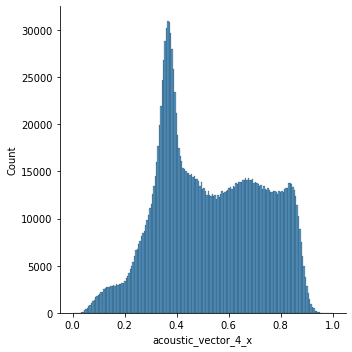

In [ ]:
plt.figure(figsize=(26,6))

sns.displot(final_df['acoustic_vector_4_x'])

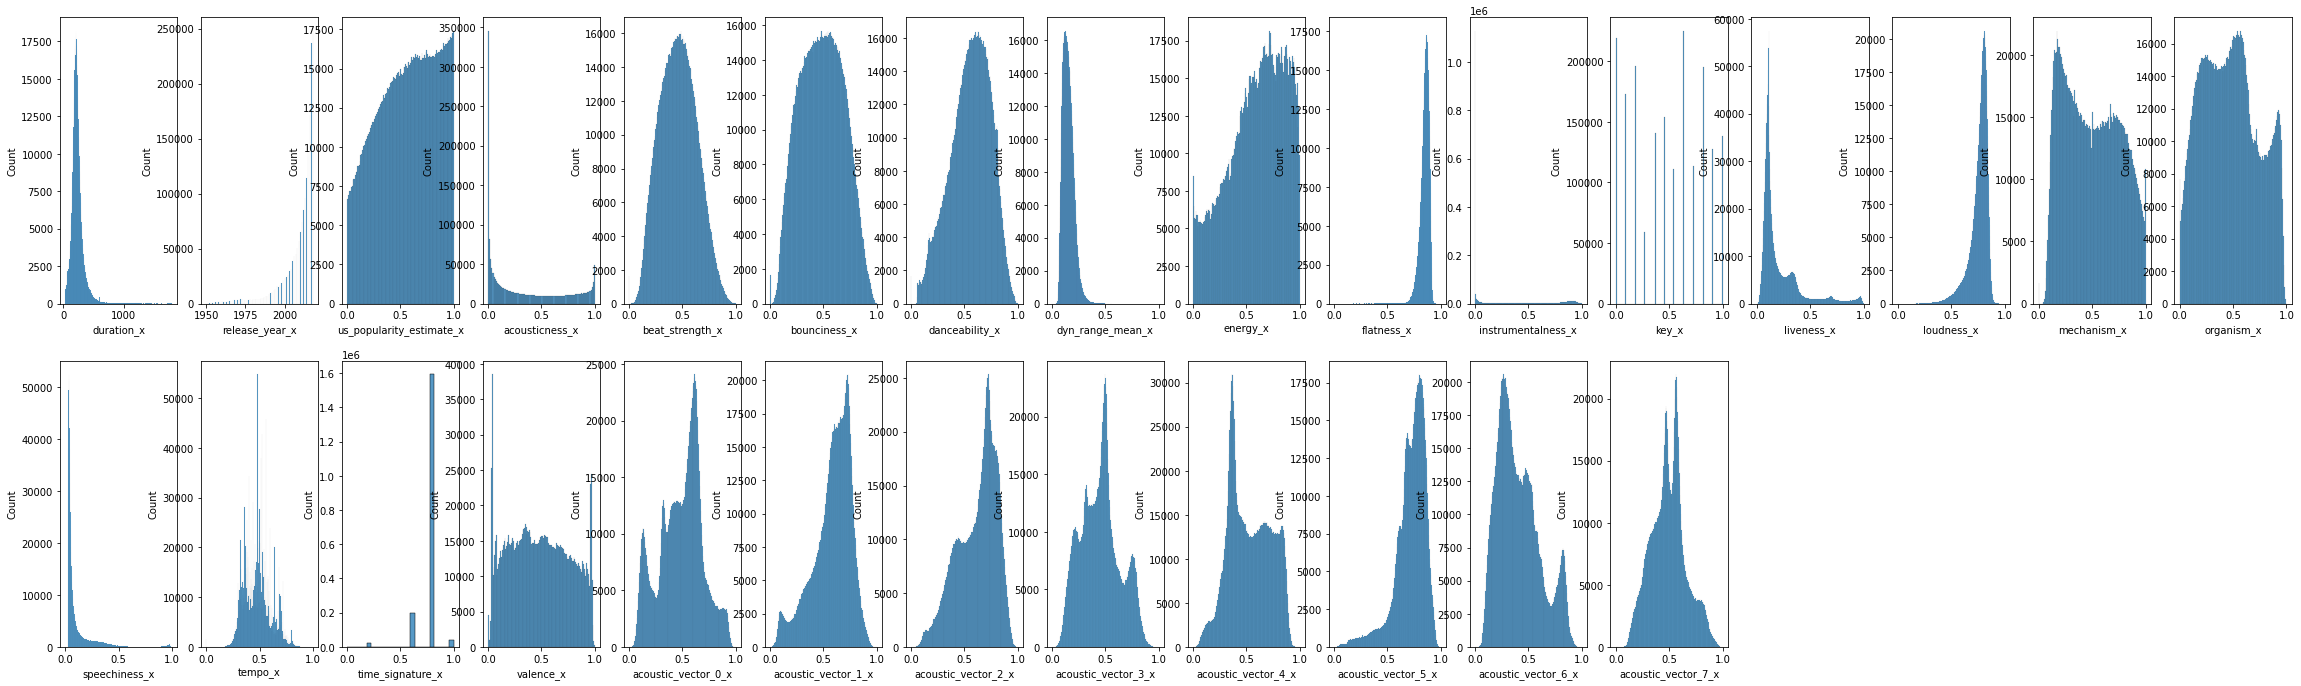

In [ ]:
plt.figure(figsize=(40,100))
for i, column in enumerate(df_copy.columns, 1):
    plt.subplot(16,16,i)
    sns.histplot(df_copy[column])

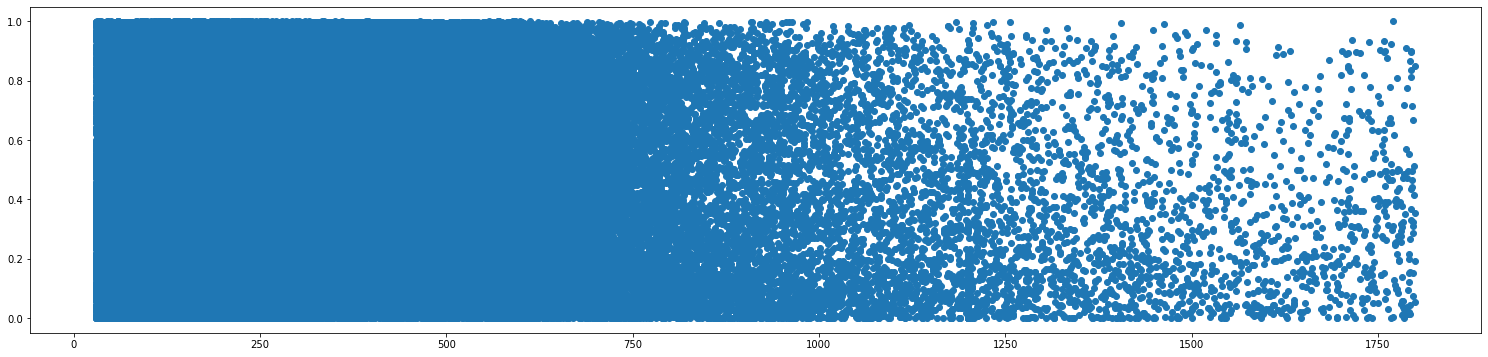

In [ ]:
plt.figure(figsize=(26,6))
plt.scatter(final_df['duration_x'], final_df['energy_x'])


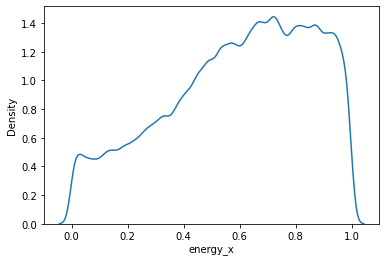

In [ ]:
sns.kdeplot(final_df['energy_x']);


In [ ]:
sns.relplot(data= final_df)